# **Arabic and English Translator**

In [1]:
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17

Found existing installation: unsloth 2024.12.4
Uninstalling unsloth-2024.12.4:
  Successfully uninstalled unsloth-2024.12.4
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-364nvevq
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-364nvevq
  Resolved https://github.com/unslothai/unsloth.git to commit df808d074d307d396b8c04640ef51375d68f2ef0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.12.4-py3-none-any.whl size=173562 sha256=0140891ef1bba47874bd1947f9eeeda74b5c77c0dc7dfd40408bcc0ba08b44bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-afmdqqd7/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [2]:
import pandas as pd
from unsloth import FastLanguageModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [3]:

max_seq_length = 2048
dtype = None
load_in_4bit = True


model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Phi-3.5-mini-instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.12.4: Fast Llama patching. Transformers:4.46.3.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 8.0. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.26G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/140 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

In [4]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
    loftq_config=None
)


Unsloth 2024.12.4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [7]:
# Load the dataset using pandas
data_df = pd.read_json('/content/drive/MyDrive/Ara/Arabic.json', encoding='utf-8')
data_df.head()

instruction  \
0   Could you render the given sentence into Arabic?   
1  The given sentence is in English, you should t...   
2  Your job is to translate the below sentence in...   
3  I would like the given sentence to be translat...   
4  The given sentence is in English, you should t...   

                                               input  \
0               Give three tips for staying healthy.   
1  1. Eat a balanced and nutritious diet: Make su...   
2                 What are the three primary colors?   
3  The three primary colors are red, blue, and ye...   
4                 Describe the structure of an atom.   

                                              output  
0                   أعط ثلاث نصائح للبقاء بصحة جيدة.  
1   1. تناول نظامًا غذائيًا متوازنًا ومغذيًا: تأك...  
2                    ما هي الألوان الثلاثة الأساسية؟  
3  الألوان الثلاثة الأساسية هي الأحمر والأزرق وال...  
4                                     صف بنية الذرة.

In [8]:
import pandas as pd
from transformers import AutoTokenizer
from datasets import Dataset

Arabic_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token

data_df = pd.read_json('/content/drive/MyDrive/Ara/Arabic.json', encoding='utf-8')
data_df = data_df.head(400)

def formatting_prompts_func(row):
    instruction = row['instruction']
    input_text = row['input']
    output_text = row['output']
    return f"{Arabic_prompt.format(instruction, input_text, output_text)}{EOS_TOKEN}"

data_df['formatted_text'] = data_df.apply(formatting_prompts_func, axis=1)

dataset = Dataset.from_dict({"text": data_df['formatted_text'].tolist()})
split_data = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split_data["train"]
validation_dataset = split_data["test"]

print(f"Total dataset size: {len(dataset)}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(validation_dataset)}")


Total dataset size: 400
Training dataset size: 320
Validation dataset size: 80


<a name="Train"></a>


In [9]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    packing=False,
    args=TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        warmup_steps=5,
        max_steps=30,
        learning_rate=2e-4,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=1,
        evaluation_strategy="steps",
        eval_steps=5,
        save_strategy="steps",
        save_steps=5,
        save_total_limit=2,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
        report_to="none",
    ),
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/320 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/80 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

trainer_stats = trainer.train()

metrics = trainer.state.log_history
df = pd.DataFrame(metrics)
df.to_csv("training_curve_Phi_3_5_Arabic.csv", index=False)

print("Fine-tuned model training completed.")
print("Training metrics saved as 'training_curve_Phi_3_5_Arabic.csv'")


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 320 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 30
 "-____-"     Number of trainable parameters = 29,884,416


Fine-tuned model training completed.
Training metrics saved as 'training_curve_Phi_3_5_Arabic.csv'


In [11]:
trainer.save_model("Phi_3_5_Fine_tuned_model_Arabic")
tokenizer.save_pretrained("Phi_3_5_Fine_tuned_model_Arabic")

print("Fine-tuned model saved as 'Phi_3_5_Fine_tuned_model_Arabic'")

Fine-tuned model saved as 'Phi_3_5_Fine_tuned_model_Arabic'


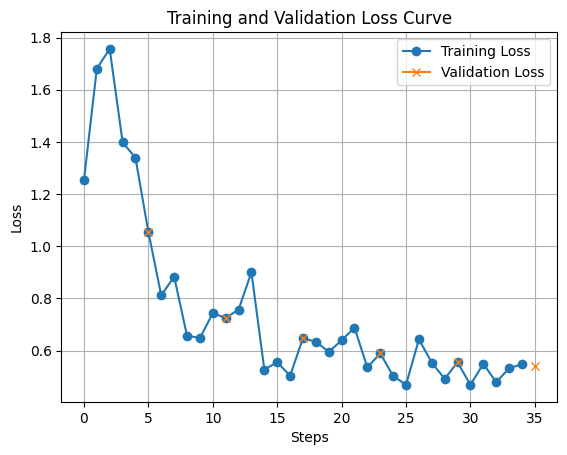

Model and tokenizer saved.
Training losses stored in 'training_losses_Phi3_5_Fine_tuned_model.csv'


In [29]:
if "loss" in df.columns:
    plt.plot(df["loss"], label="Training Loss", marker='o')

if "eval_loss" in df.columns:
    plt.plot(df["eval_loss"], label="Validation Loss", marker='x')

plt.title("Training and Validation Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("loss_curve_Phi_3_5_Arabic.png")
plt.show()

print("Model and tokenizer saved.")
print("Training losses stored in 'training_losses_Phi3_5_Fine_tuned_model.csv'")
